In [4]:
# !pip install scikit-learn
# !pip install seaborn
# !pip install pandas
# !pip install matplotlib
# !pip install numpy

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [20]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


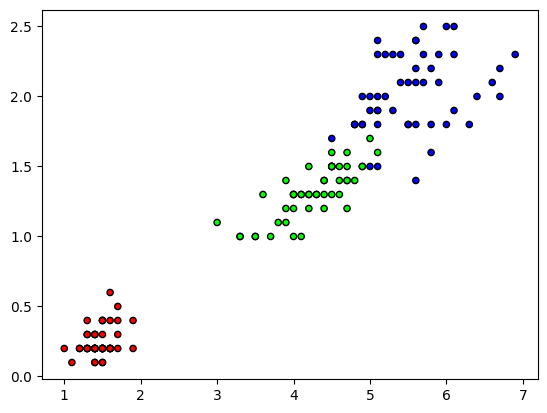

In [7]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [21]:
#from our KNN.py file
from KNN import KNN
# clf = KNN(k=5)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)

# print(predictions)

# acc = np.sum(predictions == y_test) / len(y_test)
# print(acc)
scc_list = []
for k in range (1,11) :
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # print(predictions)
    acc = np.sum(predictions == y_test) / len(y_test)
    scc_list.append(acc)
    # print(acc)

10

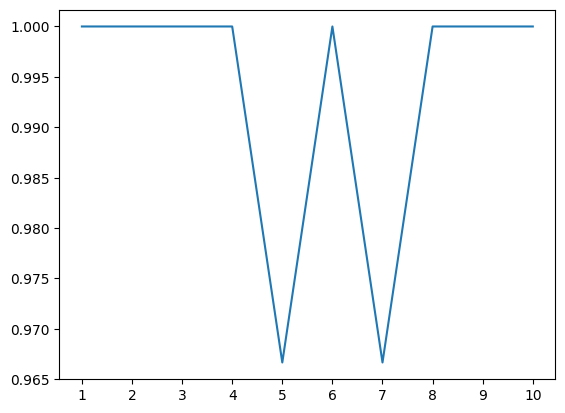

In [22]:
plt.plot([i for i in range (1, 11)], scc_list)
plt.xticks(range(1,11))
len(scc_list)

In [9]:
clf.predict([[4.8,3.0,1.5,0.3]])

[0]

In [10]:
len(X_train)

120

In [11]:
len(X_test)

30

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
knn_1.score(X_test, y_test)

0.9666666666666667

In [15]:
knn_1.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = knn_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]])

Text(58.222222222222214, 0.5, 'Truth')

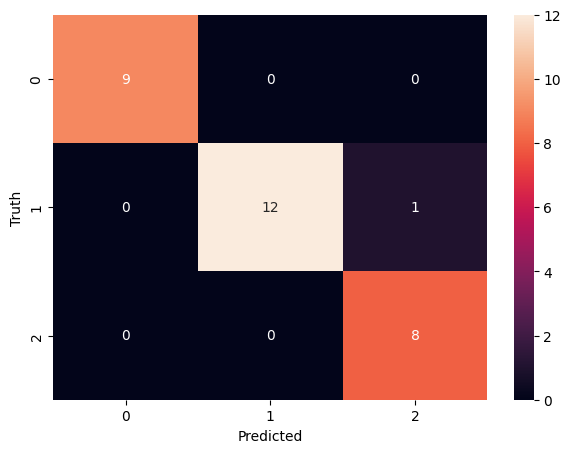

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

